In [1]:
### import manually defined automata
%matplotlib inline
from csrl.mdp import GridMDP
#from csrl.oa import OmegaAutomaton
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = '(GFa & GFb) & G!c' ### goes to 'a' then 'b' recurrently, gallobly ! c
#ltl = 'F(a & Fb) & G!c' ### goes to 'a' then 'b', gallobly ! c
# Translate the LTL formula to an LDBA
#oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 1


Initial state: 0
Transition function: [
  {(): 0, ('a',): 0, ('b',): 0, ('a', 'b'): 0}
]
Acceptance: [
  {(): [None], ('a',): [None], ('b',): [True], ('a', 'b'): [None]}
]


(None, None, None)

In [2]:
# MDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['B',  'B',  'E',  'E',  'B',  'B',  'E',  'E',  'B',  'B'],
['B',  'B',  'E',  'E',  'B',  'B',  'E',  'E',  'B',  'B'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures
#grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)


C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_27408/4015061931.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]]])

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [5]:
 t2, epsilon, average_accumulated_rewards = csrl.train_DRQN(EPISODES=1000, num_steps=500, batch_size=32, weights_update=50, state_sequence_size=5)

START state: (0, 0, 9, 0)
episode: 0/1000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 380.0
START state: (0, 0, 8, 0)


D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 1/1000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 2/1000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 8, 0)
episode: 3/1000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 8, 1)
episode: 4/1000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 8, 0)
episode: 5/1000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 610.0
START state: (0, 0, 9, 1)
episode: 6/1000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 350.0
START state: (0, 0, 8, 0)
episode: 7/1000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 1)
episode: 8/1000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 9/1000, steps: 500, e: 0.9
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 10/1000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 630.0
START state: 

episode: 81/1000, steps: 500, e: 0.38
accumulated_rewards_per_episode: 3690.0
START state: (0, 0, 9, 1)
episode: 82/1000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 2880.0
START state: (0, 0, 8, 1)
episode: 83/1000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 1940.0
START state: (0, 0, 9, 0)
episode: 84/1000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 510.0
START state: (0, 0, 8, 1)
episode: 85/1000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 3200.0
START state: (0, 0, 8, 1)
episode: 86/1000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 4210.0
START state: (0, 0, 8, 0)
episode: 87/1000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 3450.0
START state: (0, 0, 9, 1)
episode: 88/1000, steps: 500, e: 0.35
accumulated_rewards_per_episode: 3880.0
START state: (0, 0, 9, 0)
episode: 89/1000, steps: 500, e: 0.34
accumulated_rewards_per_episode: 3280.0
START state: (0, 0, 9, 1)
episode: 90/1000, steps: 500, e: 0.34
accumulated_rewards_per_epi

episode: 160/1000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 1870.0
START state: (0, 0, 8, 0)
episode: 161/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 3700.0
START state: (0, 0, 9, 0)
episode: 162/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 3520.0
START state: (0, 0, 8, 1)
episode: 163/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 3310.0
START state: (0, 0, 9, 1)
episode: 164/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 3820.0
START state: (0, 0, 8, 0)
episode: 165/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 2940.0
START state: (0, 0, 9, 1)
episode: 166/1000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 167/1000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 4110.0
START state: (0, 0, 8, 0)
episode: 168/1000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 730.0
START state: (0, 0, 9, 0)
episode: 169/1000, steps: 500, e: 0.13
accumulated_rewards_

episode: 239/1000, steps: 500, e: 0.057
accumulated_rewards_per_episode: 4080.0
START state: (0, 0, 9, 0)
episode: 240/1000, steps: 500, e: 0.056
accumulated_rewards_per_episode: 3270.0
START state: (0, 0, 8, 1)
episode: 241/1000, steps: 500, e: 0.055
accumulated_rewards_per_episode: 2280.0
START state: (0, 0, 8, 1)
episode: 242/1000, steps: 500, e: 0.055
accumulated_rewards_per_episode: 2900.0
START state: (0, 0, 9, 1)
episode: 243/1000, steps: 500, e: 0.054
accumulated_rewards_per_episode: 2860.0
START state: (0, 0, 8, 0)
episode: 244/1000, steps: 500, e: 0.054
accumulated_rewards_per_episode: 3920.0
START state: (0, 0, 8, 1)
episode: 245/1000, steps: 500, e: 0.053
accumulated_rewards_per_episode: 4420.0
START state: (0, 0, 8, 0)
episode: 246/1000, steps: 500, e: 0.052
accumulated_rewards_per_episode: 3390.0
START state: (0, 0, 9, 1)
episode: 247/1000, steps: 500, e: 0.052
accumulated_rewards_per_episode: 2690.0
START state: (0, 0, 9, 1)
episode: 248/1000, steps: 500, e: 0.051
accumu

episode: 317/1000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 4450.0
START state: (0, 0, 8, 1)
episode: 318/1000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 4580.0
START state: (0, 0, 9, 0)
episode: 319/1000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 4610.0
START state: (0, 0, 8, 0)
episode: 320/1000, steps: 500, e: 0.021
accumulated_rewards_per_episode: 4440.0
START state: (0, 0, 8, 1)
episode: 321/1000, steps: 500, e: 0.021
accumulated_rewards_per_episode: 3800.0
START state: (0, 0, 9, 0)
episode: 322/1000, steps: 500, e: 0.021
accumulated_rewards_per_episode: 4190.0
START state: (0, 0, 9, 0)
episode: 323/1000, steps: 500, e: 0.021
accumulated_rewards_per_episode: 4350.0
START state: (0, 0, 8, 1)
episode: 324/1000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 4360.0
START state: (0, 0, 8, 0)
episode: 325/1000, steps: 500, e: 0.02
accumulated_rewards_per_episode: 2530.0
START state: (0, 0, 9, 0)
episode: 326/1000, steps: 500, e: 0.02
accumulat

episode: 395/1000, steps: 500, e: 0.0087
accumulated_rewards_per_episode: 4260.0
START state: (0, 0, 8, 1)
episode: 396/1000, steps: 500, e: 0.0086
accumulated_rewards_per_episode: 4010.0
START state: (0, 0, 9, 1)
episode: 397/1000, steps: 500, e: 0.0085
accumulated_rewards_per_episode: 4680.0
START state: (0, 0, 8, 1)
episode: 398/1000, steps: 500, e: 0.0084
accumulated_rewards_per_episode: 4440.0
START state: (0, 0, 8, 1)
episode: 399/1000, steps: 500, e: 0.0083
accumulated_rewards_per_episode: 4610.0
START state: (0, 0, 9, 0)
episode: 400/1000, steps: 500, e: 0.0082
accumulated_rewards_per_episode: 4340.0
START state: (0, 0, 9, 0)
episode: 401/1000, steps: 500, e: 0.0081
accumulated_rewards_per_episode: 4620.0
START state: (0, 0, 8, 1)
episode: 402/1000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 4530.0
START state: (0, 0, 8, 0)
episode: 403/1000, steps: 500, e: 0.0079
accumulated_rewards_per_episode: 4650.0
START state: (0, 0, 9, 1)
episode: 404/1000, steps: 500, e: 0.00

episode: 472/1000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 4060.0
START state: (0, 0, 9, 0)
episode: 473/1000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 3800.0
START state: (0, 0, 8, 1)
episode: 474/1000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 3140.0
START state: (0, 0, 8, 0)
episode: 475/1000, steps: 500, e: 0.0033
accumulated_rewards_per_episode: 4090.0
START state: (0, 0, 9, 0)
episode: 476/1000, steps: 500, e: 0.0033
accumulated_rewards_per_episode: 4520.0
START state: (0, 0, 9, 0)
episode: 477/1000, steps: 500, e: 0.0033
accumulated_rewards_per_episode: 3620.0
START state: (0, 0, 9, 0)
episode: 478/1000, steps: 500, e: 0.0032
accumulated_rewards_per_episode: 4380.0
START state: (0, 0, 9, 0)
episode: 479/1000, steps: 500, e: 0.0032
accumulated_rewards_per_episode: 4690.0
START state: (0, 0, 9, 1)
episode: 480/1000, steps: 500, e: 0.0032
accumulated_rewards_per_episode: 4600.0
START state: (0, 0, 9, 0)
episode: 481/1000, steps: 500, e: 0.0

episode: 549/1000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 4160.0
START state: (0, 0, 9, 1)
episode: 550/1000, steps: 500, e: 0.0014
accumulated_rewards_per_episode: 4040.0
START state: (0, 0, 8, 0)
episode: 551/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 4470.0
START state: (0, 0, 9, 0)
episode: 552/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 553/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 3860.0
START state: (0, 0, 9, 0)
episode: 554/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 3970.0
START state: (0, 0, 8, 0)
episode: 555/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 4670.0
START state: (0, 0, 9, 0)
episode: 556/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 4820.0
START state: (0, 0, 8, 0)
episode: 557/1000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 4580.0
START state: (0, 0, 9, 1)
episode: 558/1000, steps: 500, e: 0.0012

episode: 627/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 1320.0
START state: (0, 0, 8, 0)
episode: 628/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3250.0
START state: (0, 0, 9, 0)
episode: 629/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3330.0
START state: (0, 0, 8, 0)
episode: 630/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3630.0
START state: (0, 0, 8, 1)
episode: 631/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4750.0
START state: (0, 0, 9, 0)
episode: 632/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4700.0
START state: (0, 0, 8, 0)
episode: 633/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 634/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 1)
episode: 635/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4250.0
START state: (0, 0, 9, 1)
episode: 636/1000, steps: 500, e: 0.001
accumulated_

episode: 705/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4480.0
START state: (0, 0, 9, 1)
episode: 706/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 1700.0
START state: (0, 0, 9, 0)
episode: 707/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4390.0
START state: (0, 0, 9, 1)
episode: 708/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3630.0
START state: (0, 0, 8, 0)
episode: 709/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3770.0
START state: (0, 0, 8, 0)
episode: 710/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3540.0
START state: (0, 0, 8, 0)
episode: 711/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2220.0
START state: (0, 0, 8, 0)
episode: 712/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3980.0
START state: (0, 0, 9, 0)
episode: 713/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4500.0
START state: (0, 0, 9, 0)
episode: 714/1000, steps: 500, e: 0.001
accumu

episode: 783/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4510.0
START state: (0, 0, 9, 1)
episode: 784/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2640.0
START state: (0, 0, 8, 1)
episode: 785/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4720.0
START state: (0, 0, 9, 0)
episode: 786/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4650.0
START state: (0, 0, 9, 1)
episode: 787/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4630.0
START state: (0, 0, 8, 0)
episode: 788/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4740.0
START state: (0, 0, 8, 0)
episode: 789/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 790/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 791/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4250.0
START state: (0, 0, 9, 1)
episode: 792/1000, steps: 500, e: 0.001
accumulated_

episode: 861/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4120.0
START state: (0, 0, 8, 0)
episode: 862/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4320.0
START state: (0, 0, 9, 0)
episode: 863/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4320.0
START state: (0, 0, 9, 0)
episode: 864/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4540.0
START state: (0, 0, 9, 0)
episode: 865/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3980.0
START state: (0, 0, 9, 1)
episode: 866/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 3510.0
START state: (0, 0, 8, 0)
episode: 867/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2600.0
START state: (0, 0, 8, 0)
episode: 868/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2960.0
START state: (0, 0, 9, 0)
episode: 869/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4140.0
START state: (0, 0, 8, 1)
episode: 870/1000, steps: 500, e: 0.001
accumu

episode: 939/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4230.0
START state: (0, 0, 8, 0)
episode: 940/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4490.0
START state: (0, 0, 9, 0)
episode: 941/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4650.0
START state: (0, 0, 8, 0)
episode: 942/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4680.0
START state: (0, 0, 9, 0)
episode: 943/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4320.0
START state: (0, 0, 8, 0)
episode: 944/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2220.0
START state: (0, 0, 9, 0)
episode: 945/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4210.0
START state: (0, 0, 8, 0)
episode: 946/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4630.0
START state: (0, 0, 8, 1)
episode: 947/1000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 4750.0
START state: (0, 0, 8, 1)
episode: 948/1000, steps: 500, e: 0.001
accumu

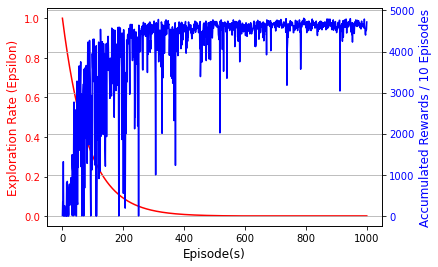

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Exploration Rate (Epsilon)', fontsize=12, color = 'red') 
ax1.plot(t2, epsilon, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Accumulated Rewards / 10 Episodes', fontsize=12, color = 'blue') 
ax2.plot(t2, average_accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
#plt.title('The Accumulated Rewards of 10 by 10 Grid-world Simulation (label uncertainty Pl = 1.0)', fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

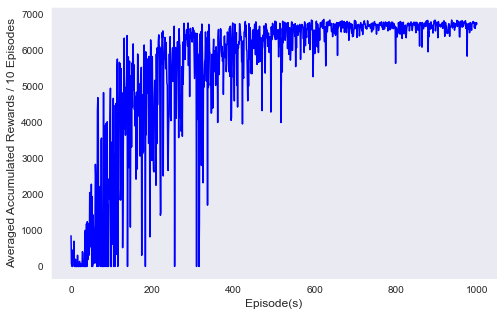

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Averaged Accumulated Rewards / 10 Episodes', fontsize=12) 
ax1.plot(t2, average_accumulated_rewards, color = 'blue') 
ax1.tick_params(axis ='y') 
# Show plot
#plt.title('The Averaged Accumulated Rewards of 10 by 10 Grid-world Simulation', fontsize=14)
plt.grid()
#plt.figure(figsize=(20,20)) 
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [11]:
# save the results
np.array(t2).tofile('NEW_t2_gtg_1000_500_CNN_16.csv', sep = ',')
np.array(average_accumulated_rewards).tofile('NEW_rewards_gtg_1000_500_CNN_16.csv', sep = ',')

In [ ]:
# read the results
import pandas as pd
t2_read = np.loadtxt('NEW_t2_gtg_100.csv', delimiter=',')
average_read = np.loadtxt('NEW_rewards_gtg_100.csv', delimiter=',')

In [7]:
import seaborn as sns
import pandas as pd
RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [8]:
t = cumsum_sma(t2,50)
averaged = cumsum_sma(average_accumulated_rewards,50)

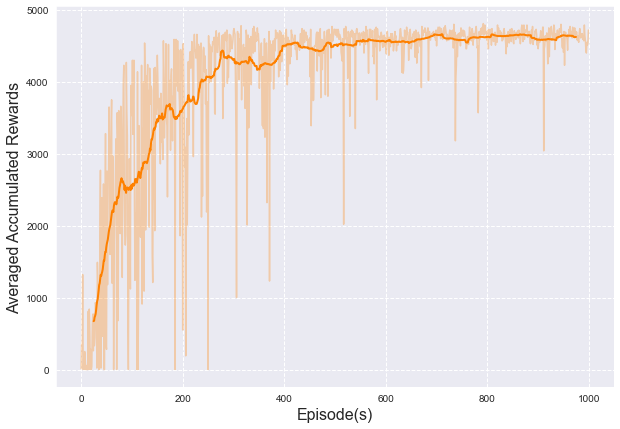

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('Episode(s)', fontsize=16) 
ax1.set_ylabel('Averaged Accumulated Rewards', fontsize=16) 

sns.set_style("darkgrid")
sns.lineplot(x = t2, y = average_accumulated_rewards, color=orange, alpha=0.3)
sns.lineplot(x = t, y = averaged, color=orange, linewidth=2)
plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
#sns.move_legend(ax, loc='upper left', frameon=False)

In [5]:
Path = csrl.verify_DRQN(EPISODES=10, num_steps=50, state_sequence_size=5)

START state: (0, 0, 9, 1)
action: 0
reward0.0
state: (0, 0, 8, 1)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 3
reward0.0
state: (0, 0, 9, 0)
action: 2
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 2
reward0.0
state: (0, 0, 9, 1)
action: 2
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 2)
action: 0
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 2)
action: 2
reward0.0
state: (0, 0, 9, 3)
action: 2
reward0.0
state: (0, 0, 9, 3)
action: 0
reward0.0
state: (0, 0, 8, 3)
action: 0
reward0.0
state: (0, 0, 7, 3)
action: 0
reward0.0
state: (0, 0, 6, 3)
action: 0
reward0.0
state: (0, 0, 5, 3)
action: 0
reward0.0
state: (0, 0, 4, 3)
action: 0
reward0.0
state: (0, 0, 3, 3)
action: 0
reward0.0
state: (0, 0, 2, 3)
action: 2
reward0.0
state: (0, 0, 2, 4)
action: 2
reward0.0
state: (0, 0, 2, 5)
action: 2
rewa

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


action: 2
reward10.0
state: (0, 0, 1, 9)
action: 2
reward10.0
state: (0, 0, 1, 9)
action: 2
reward10.0
state: (0, 0, 1, 9)
episode: 2/10, steps: 50, e: 1.0
START state: (0, 0, 9, 0)
action: 3
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 1)
action: 2
reward0.0
state: (0, 0, 9, 2)
action: 3
reward0.0
state: (0, 0, 9, 1)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.0
state: (0, 0, 9, 0)
action: 1
reward0.

In [8]:
############################# Plot the Path ##############################
import pylab as pl
from matplotlib.collections import LineCollection

path_idx = 1

size_x = csrl.shape[2]
size_y = csrl.shape[3]

path=[]
for i in range(len(Path[path_idx])):
    if Path[path_idx][i] in [8,9,18,19]:
        path.append(int(Path[path_idx][i]))
        break
    else:
        path.append(int(Path[path_idx][i]))
print('The steps taken: '+str(i))
print('path'+str(path))

The steps taken: 18
path[90, 91, 92, 82, 72, 62, 52, 53, 53, 43, 33, 34, 24, 24, 25, 26, 27, 17, 18]


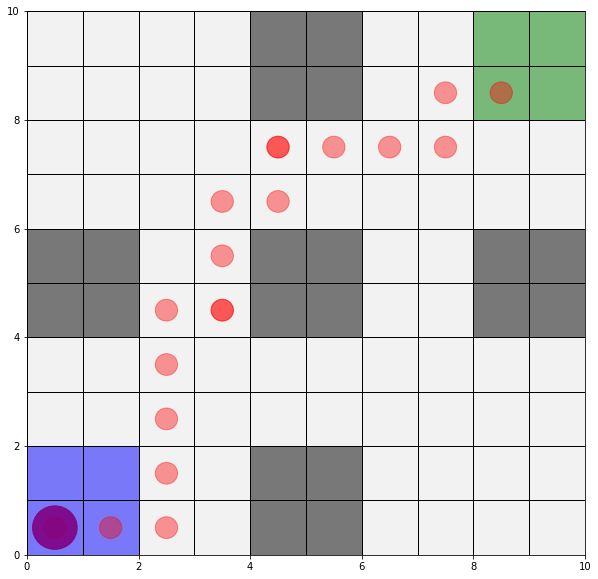

In [9]:
###### q_0 ######
    
x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='gray', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))
# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))

# plot the BLOCK state 'q_0'
start_x_1, start_y_1 = 4,8
start_x_2, start_y_2 = 4,0
start_x_3, start_y_3 = 0,4
start_x_4, start_y_4 = 8,4
start_x_5, start_y_5 = 4,4
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((start_x_1, start_y_1), b_size_x, b_size_y, fill=True, color='black', alpha=.5))
ax.add_patch(pl.Rectangle((start_x_2, start_y_2), b_size_x, b_size_y, fill=True, color='black', alpha=.5))
ax.add_patch(pl.Rectangle((start_x_3, start_y_3), b_size_x, b_size_y, fill=True, color='black', alpha=.5))
ax.add_patch(pl.Rectangle((start_x_4, start_y_4), b_size_x, b_size_y, fill=True, color='black', alpha=.5))
ax.add_patch(pl.Rectangle((start_x_5, start_y_5), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

for i in range(len(path)):
    state_idx = path[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
    if i==0:
        # start point
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
